# Chapter 5: Linear Models and Regularization

This notebook provides practical "recipes" for linear regression and regularization tasks in scikit-learn. Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls. We'll cover implementation, tuning, and evaluation of linear regression and regularization models.

## Introduction to Linear Models

### Getting ready
To get started, you'll notice that we're taking a familiar approach used in previous chapters by creating a synthetic dataset to demonstrate the concepts of linear models and regularization. scikit-learn provides a function called make_regression() that creates a synthetic regression dataset which we can further refine to create a more interesting dataset that includes some "noise" to make it more challenging.

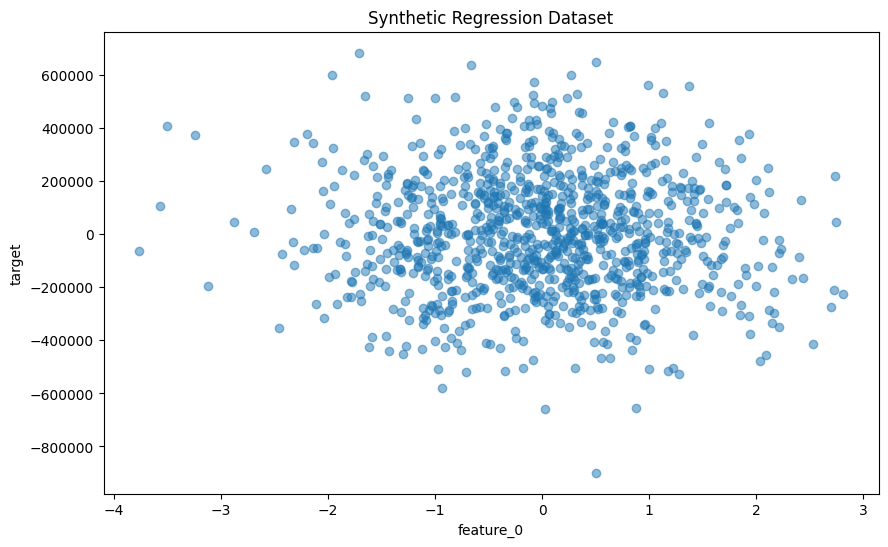

In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Create synthetic regression dataset with high multicollinearity and more features
X, y = make_regression(n_samples=1000,
                      n_features=100,     
                      n_informative=10,   
                      noise=20,           
                      random_state=123)

# Add multicollinearity by creating correlated features
for i in range(50, 100):  # Make half the features correlated
    X[:, i] = X[:, i-50] + np.random.normal(0, 0.1, size=1000)

# Create feature names
feature_names = [f'feature_{i}' for i in range(100)]

# Take just the first feature for visualization
X_plot = X[:, 0].reshape(-1, 1)

# Add some non-linearity and make coefficients vary widely in magnitude
y = y * 1000  # Scale up the target
y = y + np.sin(X_plot.ravel()) * 150 + np.exp(X_plot.ravel()/10)

# Convert to pandas DataFrame with feature names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df_plot = pd.DataFrame({'feature_0': X_plot.ravel(), 'target': y})

# Quick visualization of the data
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y, alpha=0.5)
plt.xlabel('feature_0')
plt.ylabel('target')
plt.title('Synthetic Regression Dataset')
plt.show()

### How to do it
Implementation of a linear regression model is straightforward. We'll use the train_test_split() function to split the data into training and testing sets, and then fit a linear regression model to the training data. Finally, we'll evaluate the model's performance using mean squared error (MSE) and R-squared (R^2) metrics. We can also visualize the model's predictions on the test set to see how well it fits the data.

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create and fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

In [3]:
mse

47137088866.550316

In [4]:
r2

0.0529838206362756

In [6]:
y_test

array([ -22967.59800044,  204255.81236845,  -11539.79745341,
       -170126.0219365 ,   32493.17118338,  683148.05516064,
       -128693.24925856,  215614.31672984,  238118.74078646,
        272627.29051316, -143010.03248835,  289502.5395459 ,
        181357.40565779, -160663.53887088, -298932.51375994,
         49351.19974259, -237097.57133292,   53747.37457947,
       -197850.77080686, -101742.04961846,   63288.70701259,
        -24071.54692303, -132686.23121703, -389350.42828322,
        414396.16039013, -250278.05673859,   36575.63626592,
        191148.04120449,  -96631.42285932, -412025.49607762,
        172178.53798882,  158156.51231878, -125643.2923437 ,
         77175.16687044,   20337.1876046 , -169140.70395568,
        -70622.22656812,   70204.64986228,  428928.07491692,
        138275.72347515,   33351.29744714,  248626.83183887,
       -425230.37219517,   77687.09755225, -100209.32438441,
         20257.4263614 ,  244128.27737267,  -97044.47108544,
        -89704.4130994 ,

In [5]:


# Visualize the data and regression line (using feature_0 for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['feature_0'], y_test, color='blue', alpha=0.5, label='Test Data')
plt.scatter(X_train['feature_0'], y_train, color='green', alpha=0.5, label='Train Data')

# Sort the data for a smooth line plot
X_line = np.linspace(df['feature_0'].min(), df['feature_0'].max(), 100).reshape(-1, 1)
X_line_full = np.zeros((100, len(feature_names)))
X_line_full[:, 0] = X_line.ravel()  # Set feature_0, leave others as 0
y_line = linear_model.predict(pd.DataFrame(X_line_full, columns=feature_names))

plt.plot(X_line, y_line, color='red', label='Regression Line')
plt.xlabel('feature_0')
plt.ylabel('target')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x600 with 0 Axes>

### How it works
Linear regression is a fundamental technique used to model relationships between a dependent variable (target) and one or more independent variables (features). The model assumes that there is a linear relationship between these variables

## Ridge and Lasso Regression

### Getting ready
In order to implement Ridge and Lasso regression, we'll use the Ridge and Lasso classes from the sklearn.linear_model module. These classes are similar to `LinearRegression()`, but they include an additional parameter called alpha, which controls the strength of the regularization. We can use the same dataset created in the previous section to demonstrate the implementation of Ridge and Lasso regression.

### How to do it
Let's fit both a Ridge and Lasso regression model to the data and compare the results with the linear regression model we created in the previous section. You'll notice that the Ridge and Lasso models perform better than the linear regression model, but the difference is not as significant as you might expect. This is because the data is highly multicollinear and the features are highly correlated with each other.

In [ ]:
# Load libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_train, y_train)

# Create and fit Lasso regression model with increased iterations and alpha
lasso_model = Lasso(alpha=10.0, max_iter=10000, tol=0.001)
lasso_model.fit(X_train, y_train)

# Make predictions with both models
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate performance
y_pred_linear = linear_model.predict(X_test)

# Calculate metrics for all models
metrics = {
    'Model': ['Ridge Regression', 'Lasso Regression', 'Linear Regression'],
    'Mean Squared Error': [
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_linear)
    ],
    'R-squared': [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso), 
        r2_score(y_test, y_pred_linear)
    ]
}

# Create DataFrame and sort by MSE
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values('Mean Squared Error', ascending=True)

# Format the numeric columns
metrics_df['Mean Squared Error'] = metrics_df['Mean Squared Error'].map('{:.2f}'.format)
metrics_df['R-squared'] = metrics_df['R-squared'].map('{:.2f}'.format)

display(metrics_df)

# Visualize the results (using feature_0 for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['feature_0'], y_test, color='blue', alpha=0.5, label='Test Data')

# Sort the data for smooth line plots
X_line = np.linspace(df['feature_0'].min(), df['feature_0'].max(), 100).reshape(-1, 1)
X_line_full = np.zeros((100, len(feature_names)))
X_line_full[:, 0] = X_line.ravel()
X_line_df = pd.DataFrame(X_line_full, columns=feature_names)

# Generate predictions for the line
y_line_ridge = ridge_model.predict(X_line_df)
y_line_lasso = lasso_model.predict(X_line_df)
y_line_linear = linear_model.predict(X_line_df)

plt.plot(X_line, y_line_ridge, color='red', label='Ridge Regression')
plt.plot(X_line, y_line_lasso, color='green', linestyle='--', label='Lasso Regression')
plt.plot(X_line, y_line_linear, color='purple', label='Linear Regression')
plt.xlabel('feature_0')
plt.ylabel('target')
plt.title('Ridge, Lasso, and Linear Regression Comparison')
plt.legend()
plt.show()

## ElasticNet and Regularization 

### Getting ready
In order to implement ElasticNet regression, we'll use the ElasticNet class from the sklearn.linear_model module. This class is similar to Ridge and Lasso regression, but it combines their strengths to handle different types of data. We can use the same dataset created in the previous section to demonstrate the implementation of ElasticNet regression. 

### How to do it
We will create a range of `alpha` and `l1_ratio` values to test and plot the coefficient paths for each combination. This is the main purpose of ElasticNet, to handle the multicollinearity and high-dimensional data that is common in real-world datasets. The resulting visualization is called a "coefficient path plot" and it shows the relationship between the alpha and the coefficient for each feature.

In [ ]:
# Load libraries
from sklearn.linear_model import ElasticNet

# Create a range of alphas to test
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Store coefficients for plotting
coef_paths = []
labels = []

# Create and fit ElasticNet models with different parameters
plt.figure(figsize=(10, 6))

for l1_ratio in l1_ratios:
    coefs = []
    for alpha in alphas:
        # Create and fit ElasticNet model with increased max_iter and tol
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=123,
                                 max_iter=10000, tol=1e-4)
        elastic_model.fit(X_train, y_train)
        coefs.append(elastic_model.coef_)
    
    # Convert coefficients to array and store
    coef_paths.append(np.array(coefs))
    
    # Plot coefficient paths
    for feature_idx in range(X_train.shape[1]):
        plt.plot(np.log10(alphas), 
                np.array(coefs)[:, feature_idx], 
                label=f'l1_ratio={l1_ratio}, feature_{feature_idx}' if feature_idx == 0 else "",
                alpha=0.5,
                linestyle=['solid', 'dashed', 'dotted', 'dashdot', '-'][l1_ratios.index(l1_ratio)])

plt.xlabel('log(alpha)')
plt.ylabel('Coefficient value')
plt.title('ElasticNet Coefficient Paths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a model with balanced l1_ratio and moderate alpha
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=123,
                          max_iter=10000, tol=1e-4)  
elastic_model.fit(X_train, y_train)

# Calculate metrics
elastic_pred = elastic_model.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_r2 = r2_score(y_test, elastic_pred)

# Add ElasticNet results to metrics DataFrame
new_row = pd.DataFrame({
    'Model': ['ElasticNet Regression'],
    'Mean Squared Error': [elastic_mse],
    'R-squared': [elastic_r2]
})

# Remove any existing ElasticNet entries before concatenating
metrics_df = metrics_df[~metrics_df['Model'].str.contains('ElasticNet')]

# Convert string values back to float for sorting
metrics_df['Mean Squared Error'] = metrics_df['Mean Squared Error'].astype(float)
metrics_df['R-squared'] = metrics_df['R-squared'].astype(float)

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Sort the metrics DataFrame by Mean Squared Error
metrics_df = metrics_df.sort_values('Mean Squared Error', ascending=True)

# Format the numeric columns for display
metrics_df['Mean Squared Error'] = metrics_df['Mean Squared Error'].map('{:.2f}'.format)
metrics_df['R-squared'] = metrics_df['R-squared'].map('{:.2f}'.format)

# Display updated metrics
display(metrics_df)

## Polynomial Regression 

### Getting ready
Let’s move on and explore polynomial regression (including spline interpolation). These methods extend the capabilities of traditional linear regression, allowing for more flexible modeling of complex relationships in data. By implementing these techniques, you can expand your toolbox of approaches to regression problems..

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic dataset with non-linear relationships
np.random.seed(123)
n_samples = 1000
X = np.random.uniform(-50, 50, (n_samples, 1))

# Create target with non-linear components:
y = (2 * X[:, 0]  # linear component
     + 27 * np.sin(X[:, 0] / 8)  
     + np.random.normal(0, 4, n_samples))  # noise

# Create DataFrame
data = pd.DataFrame(X, columns=['feature1'])
data['target'] = y

# Create plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='feature1', y='target')
plt.title('Feature 1 vs Target')
plt.tight_layout()
plt.show()

### How to do it...
In the code below, we will create a list of polynomial degrees to try and then fit a linear regression model on the polynomial features. We will then evaluate the model's performance using mean squared error (MSE) and R-squared (R^2) metrics. Finally, we will visualize the different polynomial fits and the residuals for the best performing model. Keep in mind that the best performing model is not always the one with the highest R-squared value, but rather the one that best fits the data and has the lowest mean squared error. Also, the visualization is a bit messy, but it's a good starting point (you probably won't come across a dataset with such a clean relationship between the features and the target with a perfect sine wave nonlinearity, anyway).

In [ ]:
# Load libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Use the synthetic dataset created above
X = data[['feature1']]  
y = data['target']

# Create a list of polynomial degrees to try
degrees = [1, 2, 3, 4, 5]
results = []

# Try different polynomial degrees
for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=123)
    
    # Create and fit Linear Regression model on polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = poly_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Degree': degree,
        'MSE': mse,
        'R2': r2
    })

# Create DataFrame of results
results_df = pd.DataFrame(results)
print("\nModel Performance Metrics:")
print(results_df.to_string(index=False))

# Create visualization of different polynomial fits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot data and polynomial fits
ax1.scatter(X['feature1'], y, alpha=0.2, label='Data points')

# Generate points for smooth curve plotting
X_plot = np.linspace(X['feature1'].min(), X['feature1'].max(), 1000).reshape(-1, 1)

colors = ['blue', 'green', 'red', 'purple', 'black']
for degree, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree=degree)
    X_plot_poly = poly.fit_transform(X_plot)
    
    model = LinearRegression()
    model.fit(poly.fit_transform(X), y)
    y_plot = model.predict(X_plot_poly)
    
    ax1.plot(X_plot, y_plot, label=f'Degree {degree}', color=color, linewidth=2)

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Target')
ax1.set_title('Polynomial Regression Fits')
ax1.legend(loc='upper left')

# Plot residuals for best performing model (based on R2)
best_degree = results_df.loc[results_df['R2'].idxmax(), 'Degree']
best_poly = PolynomialFeatures(degree=best_degree)
X_poly_best = best_poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly_best, y, test_size=0.2, random_state=123)

best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

ax2.scatter(y_pred, residuals, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title(f'Residual Plot (Best Model: Degree {best_degree})')

plt.tight_layout()
plt.show()

### Spline Interpolation 
Spline interpolation is a technique used to create a smooth curve that passes through a set of data points. It is a type of interpolation that uses piecewise polynomials to approximate the data. The basic idea is to divide the data into segments, and then fit a polynomial to each segment. The resulting curve is smooth and continuous at the points where the segments meet.

scikit-learn provides a SplineTransformer class that can be used to create spline interpolation. This class allows you to specify the number of "knots" (the points where the segments meet) and the degree of the polynomial to use for each segment. The SplineTransformer class is part of the sklearn.preprocessing module.

In [ ]:
# Load libraries
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create a spline transformer with different degrees of freedom
n_knots = [3, 5, 7]  # Different numbers of knots to try
plt.figure(figsize=(12, 6))

# Create lists to store metrics
mse_scores = []
r2_scores = []

for n_knot, color in zip(n_knots, colors[:len(n_knots)]):
    # Create and fit spline transformer
    spline = SplineTransformer(n_knots=n_knot, degree=3)
    model = make_pipeline(spline, LinearRegression())
    model.fit(X, y)
    
    # Generate predictions
    y_pred = model.predict(X_plot)
    y_pred_train = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # Plot the results
    plt.plot(X_plot, y_pred, 
             label=f'Spline (knots={n_knot})', 
             color=color, 
             linewidth=2)

# Plot original data points
plt.scatter(X, y, color='black', alpha=0.5, label='Data points')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Spline Interpolation with Different Numbers of Knots')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Create and display metrics DataFrame
metrics_df = pd.DataFrame({
    'Number of Knots': n_knots,
    'MSE': mse_scores,
    'R-squared': r2_scores
})
display(metrics_df)


## Practical Exercises with Linear Models and Regularization

### Exercise 1: Implementing Ridge Regression
In the first execise, we will create a new dataset and fit a Ridge regression model to it. We will then evaluate the model's performance using mean squared error (MSE) and R-squared (R^2) metrics. Finally, we will visualize the model's predictions on the test set to see how well it fits the data. When applicable, be sure to use random_state=123 and/or np.random.seed(123) to ensure reproducibility.

In [ ]:
# Load libraries
YOUR CODE HERE

# Generate synthetic dataset with some noise
YOUR CODE HERE

# Split data into training and test sets
YOUR CODE HERE

# Create and fit Ridge regression model
YOUR CODE HERE

# Make predictions
YOUR CODE HERE

# Calculate metrics
YOUR CODE HERE

# Print metrics
YOUR CODE HERE

# Visualize results
YOUR CODE HERE

# Sort X values for smooth line plot
YOUR CODE HERE

### Exercise 2: Implementing Lasso Regression
In this next exercise, we will create a new dataset and fit a Lasso regression model to it. We will then evaluate the model's performance using mean squared error (MSE) and R-squared (R^2) metrics. Finally, we will visualize the model's predictions on the test set to see how well it fits the data. When applicable, be sure to use random_state=123 and/or np.random.seed(123) to ensure reproducibility.


In [ ]:
# Load libraries
YOUR CODE HERE

# Generate synthetic data
YOUR CODE HERE

# Split the data into training and test sets
YOUR CODE HERE

# Create and fit Lasso regression model
YOUR CODE HERE

# Make predictions
YOUR CODE HERE

# Calculate metrics
YOUR CODE HERE

# Print metrics
YOUR CODE HERE

# Visualize results
YOUR CODE HERE

# Sort X values for smooth line plot
YOUR CODE HERE

### Exercise 3: Implementing ElasticNet Regression
In this final exercise, we will create a new dataset and fit an ElasticNet regression model to it. We will then evaluate the model's performance using mean squared error (MSE) and R-squared (R^2) metrics. Finally, we will visualize the model's predictions on the test set to see how well it fits the data. When applicable, be sure to use random_state=123 and/or np.random.seed(123) to ensure reproducibility.

In [ ]:
# Load libraries
YOUR CODE HERE

# Generate synthetic data
YOUR CODE HERE

# Split the data into training and test sets
YOUR CODE HERE  

# Create and fit ElasticNet model
YOUR CODE HERE

# Make predictions
YOUR CODE HERE

# Calculate metrics
YOUR CODE HERE

# Print metrics
YOUR CODE HERE

# Visualize results
YOUR CODE HERE

# Sort X values for smooth line plot
YOUR CODE HERE